# Taller 1 - Pytorch Essentials

#### **Integrantes**
- Daniel Andrade (✉ daniel.andrade01@usa.edu.co)
- Dewith Miramón (✉ dewith.miramon01@usa.edu.co)
- Santiago Prado (✉ santiago.prado01@usa.edu.co)

In [152]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

## Punto 1

Desde `pytorch` implemente la solucion de un sistema de ecuaciones lineal de la forma:

$$
\begin{matrix}
    a_{11} x_1 + a_{12} x_2 + \dots a_{1m} x_m = b_1\\
    a_{21} x_1 + a_{22} x_2 + \dots a_{2m} x_m = b_2\\
    \vdots\\
    a_{n1} x_1 + a_{n2} x_2 + \dots a_{nm} x_m = b_n
\end{matrix}
$$

Su solucion debe usar operaciones matriciales

In [153]:
n = 5
low, high = 0, 10
a = torch.randint(low=low, high=high, size=(n, n), dtype=torch.float64)
b = torch.randint(low=low, high=high, size=(n, 1), dtype=torch.float64)
x = torch.inverse(a) @ b
b_final = torch.round(a @ x, decimals=1)

In [154]:
print('a')
print(a)
print('-' * 60)

print('b')
print(b)
print('-' * 60)

print('x')
print(x)
print('-' * 60)

print('b_final')
print(b)

a
tensor([[3., 2., 4., 7., 6.],
        [1., 3., 5., 4., 2.],
        [6., 1., 3., 9., 1.],
        [1., 4., 0., 9., 2.],
        [5., 2., 1., 5., 7.]], dtype=torch.float64)
------------------------------------------------------------
b
tensor([[1.],
        [9.],
        [9.],
        [5.],
        [1.]], dtype=torch.float64)
------------------------------------------------------------
x
tensor([[ 1.5918],
        [ 2.6986],
        [ 0.8630],
        [-0.4767],
        [-1.5479]], dtype=torch.float64)
------------------------------------------------------------
b_final
tensor([[1.],
        [9.],
        [9.],
        [5.],
        [1.]], dtype=torch.float64)


## Punto 2

Dados los datos, implemente la [solucion analitica](https://towardsdatascience.com/analytical-solution-of-linear-regression-a0e870b038d5) de un modelo de regresion lineal utilizando operaciones matriciales desde `torch`:

In [155]:
X2 = torch.rand(size=(500,  1))
y2 = 5 * X2 + 5 + 0.5 * torch.randn(size=(500, 1))

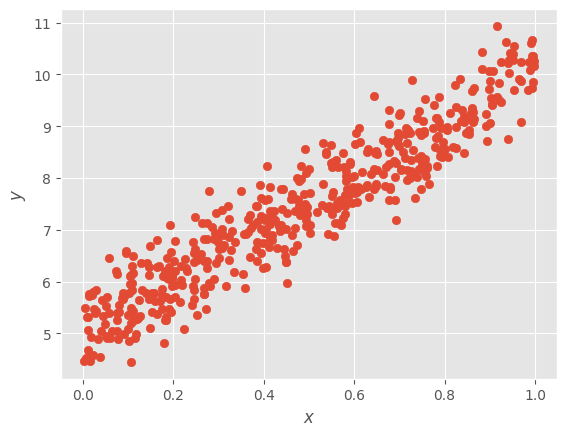

In [156]:
fig, ax = plt.subplots()
ax.scatter(X2.flatten(), y2.flatten())
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.show()

In [157]:
X2_new = torch.ones(len(X2),2)
X2_new[:,1] = X2[:,0]
b2 = torch.mm(torch.mm(torch.linalg.inv(torch.mm(X2_new.T, X2_new)), X2_new.T), y2)
y_hat2 = torch.mm(X2_new, b2)

Genere una grafica donde muestre la recta obtenida sobre el conjunto de datos:

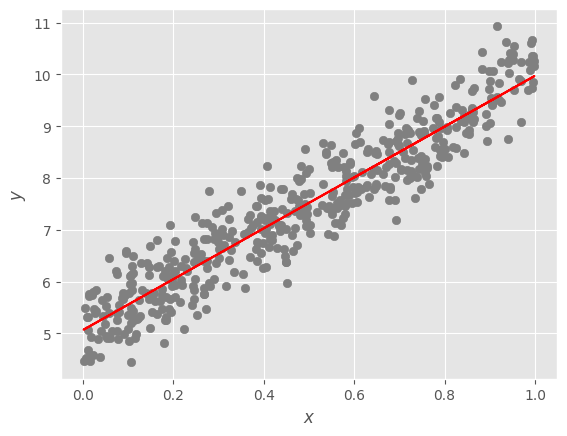

In [158]:
plt.scatter(X2, y2, color='gray')
plt.plot(X2, y_hat2, color='red')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

## Punto 3

Dados los datos, implemente la [solucion analitica](https://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution) de un modelo de ridge regression utilizando operaciones matriciales desde `torch`:

In [159]:
X3 = torch.rand(size=(500,  1))
y3 = 4 * X3 - 1 + 0.5 * torch.randn(size=(500, 1))

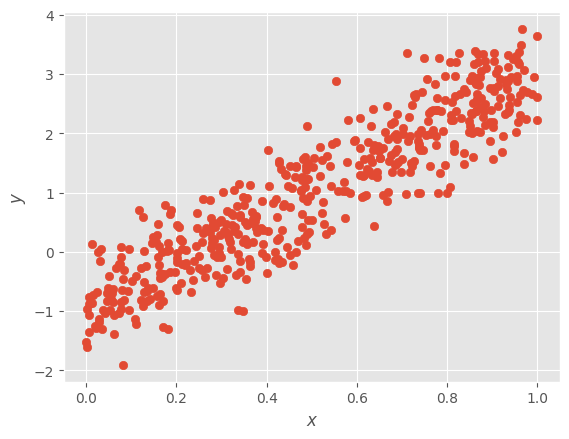

In [160]:
fig, ax = plt.subplots()
ax.scatter(X3.flatten(), y3.flatten())
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.show()

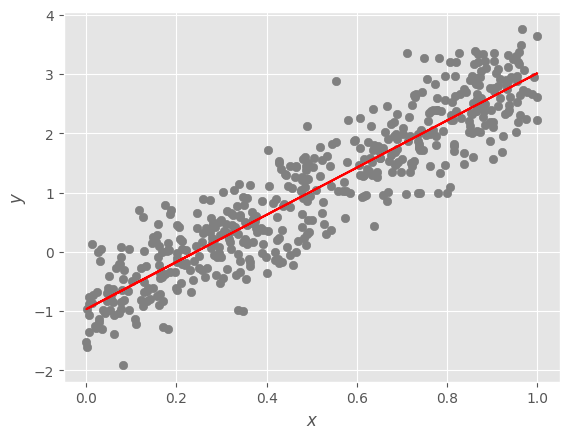

In [161]:
N3, M3 = X3.shape
X3_new = torch.ones(N3,2)
X3_new[:,1] = X3[:,0]

alpha = 0.1
identity = torch.eye(M3 + 1)
b3 = torch.inverse((X3_new.T @ X3_new) + alpha * identity) @ X3_new.T @ y3 
y_hat3 = X3_new @ b3

plt.scatter(X3, y3, color='gray')
plt.plot(X3, y_hat3, color='red')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

Cambie el valor $\alpha$ y muestre que efectos tiene ese valor sobre la solucion, discuta los resultados

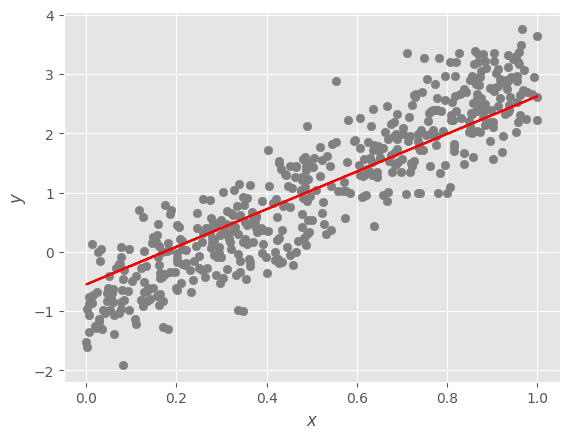

In [162]:
alpha = 10.0
b3 = torch.inverse((X3_new.T @ X3_new) + alpha * identity) @ X3_new.T @ y3 
y_hat3 = X3_new @ b3

plt.scatter(X3, y3, color='gray')
plt.plot(X3, y_hat3, color='red')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

El efecto que tiene una mayor regularización es que el modelo haga un ligero underfit de los datos. Por ello, se nota que la línea de ajuste de $\alpha$ = 0.1 es mucho mejor ajustada que $\alpha$ = 10.0

## Punto 4

Calcule experimentalmente el valor de $\pi$ utilizando [el metodo de Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method#Overview). Debe hacer todas las operaciones desde `torch`:

In [166]:
X4 = torch.rand(size=(int(1e5), 1))
y4 = torch.rand(size=(int(1e5), 1))
r = torch.sqrt(torch.square(y4) + torch.square(X4))
areas = torch.where(r>1, 0, 1)

In [167]:
pi = (torch.sum(areas) / areas.size()[0]) * 4
print(pi)

tensor(3.1406)


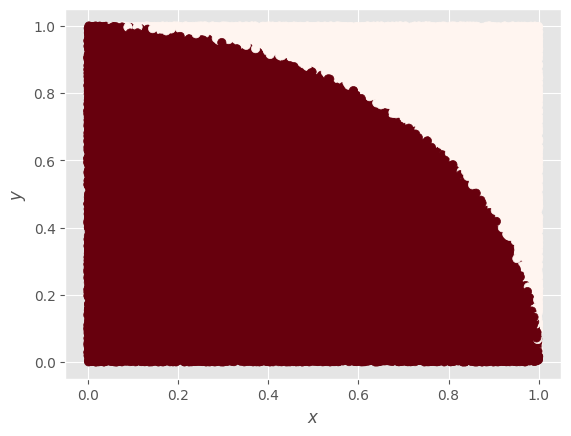

In [168]:
plt.scatter(X4, y4, c=areas, cmap='Reds', marker ="o")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

## Punto 5

Calcule un conteo de palabras utilizando unicamente `torch`:

In [169]:
# Su codigo aqui
corpus_raw = [
    ["este es el este del este"],
    ["este es pedro picapiedra"],
    ["saludos desde el este"],
    ["pedro es el este"]
]

vocabulary = set().union(*map(lambda x: x[0].split(), corpus_raw))
token_to_int = {token: int_ for token, int_ in zip(vocabulary, range(len(vocabulary)))}
int_to_token = {v: k for k, v in token_to_int.items()}
print(token_to_int)

{'el': 0, 'pedro': 1, 'desde': 2, 'del': 3, 'saludos': 4, 'picapiedra': 5, 'es': 6, 'este': 7}


In [170]:
corpus_counts = []
for text in corpus_raw:
    text = text[0]
    text_int = list(map(lambda x: token_to_int[x], text.split()))
    unique, counts = torch.unique(torch.tensor(text_int), return_counts=True)
    dict_count = dict(zip(unique.tolist(), counts.tolist()))
    corpus_counts.append(dict_count)

print(corpus_counts)

[{0: 1, 3: 1, 6: 1, 7: 3}, {1: 1, 5: 1, 6: 1, 7: 1}, {0: 1, 2: 1, 4: 1, 7: 1}, {0: 1, 1: 1, 6: 1, 7: 1}]


In [171]:
bag_of_words = torch.zeros(len(corpus_raw), len(vocabulary))

for i, token_count in enumerate(corpus_counts):
    for token, count in token_count.items():
        bag_of_words[i, token] = count

print(bag_of_words)

tensor([[1., 0., 0., 1., 0., 0., 1., 3.],
        [0., 1., 0., 0., 0., 1., 1., 1.],
        [1., 0., 1., 0., 1., 0., 0., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])


In [172]:
df_bow = pd.DataFrame(data=bag_of_words.tolist(),
                      columns=vocabulary).astype(int)
df_bow['text'] = [text[0] for text in corpus_raw]

In [173]:
df_bow

,el,pedro,desde,del,saludos,picapiedra,es,este,text
0,1,0,0,1,0,0,1,3,este es el este del este
1,0,1,0,0,0,1,1,1,este es pedro picapiedra
2,1,0,1,0,1,0,0,1,saludos desde el este
3,1,1,0,0,0,0,1,1,pedro es el este


## Punto 6

Calcule un [ponderado](https://es.wikipedia.org/wiki/Tf-idf#Detalles_matem%C3%A1ticos) `tf-idf` con sublinear-scaling usando unicamente `torch`:

In [148]:
tf = bag_of_words
print(tf)

tensor([[1., 0., 0., 1., 0., 0., 1., 3.],
        [0., 1., 0., 0., 0., 1., 1., 1.],
        [1., 0., 1., 0., 1., 0., 0., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])


In [149]:
N = bag_of_words.shape[0]
df = 1 + torch.count_nonzero(bag_of_words, dim=0) # smooth_idf to prevent zero division
idf = torch.log(N/df) + 1
print(idf)

tensor([1.0000, 1.2877, 1.6931, 1.6931, 1.6931, 1.6931, 1.0000, 0.7769])


In [150]:
tfidf = tf * idf
print(tfidf)

tensor([[1.0000, 0.0000, 0.0000, 1.6931, 0.0000, 0.0000, 1.0000, 2.3306],
        [0.0000, 1.2877, 0.0000, 0.0000, 0.0000, 1.6931, 1.0000, 0.7769],
        [1.0000, 0.0000, 1.6931, 0.0000, 1.6931, 0.0000, 0.0000, 0.7769],
        [1.0000, 1.2877, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.7769]])


In [178]:
df_tfidf = pd.DataFrame(data=tfidf.tolist(),
                      columns=vocabulary).astype(float).round(3)
df_tfidf['text'] = [text[0] for text in corpus_raw]
df_tfidf

,el,pedro,desde,del,saludos,picapiedra,es,este,text
0,1.0,0.000,0.000,1.693,0.000,0.000,1.0,2.331,este es el este del este
1,0.0,1.288,0.000,0.000,0.000,1.693,1.0,0.777,este es pedro picapiedra
2,1.0,0.000,1.693,0.000,1.693,0.000,0.0,0.777,saludos desde el este
3,1.0,1.288,0.000,0.000,0.000,0.000,1.0,0.777,pedro es el este


## Entrega

Entregue su noteboook en [este enlace](https://forms.gle/yQvsmwNRCQvkWprd9).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=132c5b41-4015-4307-8d91-727a516bc023' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>